In [76]:
import sys
sys.path.append('../')

import osmnx as ox
import networkx as ox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from scipy.optimize import curve_fit
import powerlaw

from src.utils import load_file

# Graphlet Degree Distribution Analysis

In this notebook, I explore relationships and distributions pertaining graphlets in street networks. We use the data from three cities:

In [2]:
cities_graphs = load_file('../data/d2_processed/graphs_dict.pickle')
cities_GDMs = load_file('../data/d2_processed/GDMs_dict.pickle')

In [3]:
list(cities_graphs.keys())

[('New York', 'USA'), ('Paris', 'France'), ('Rio de Janeiro', 'Brazil')]

## 1. Graphlet Degree Distributions

Let's start viewing the graphlet degree distribution of New York:

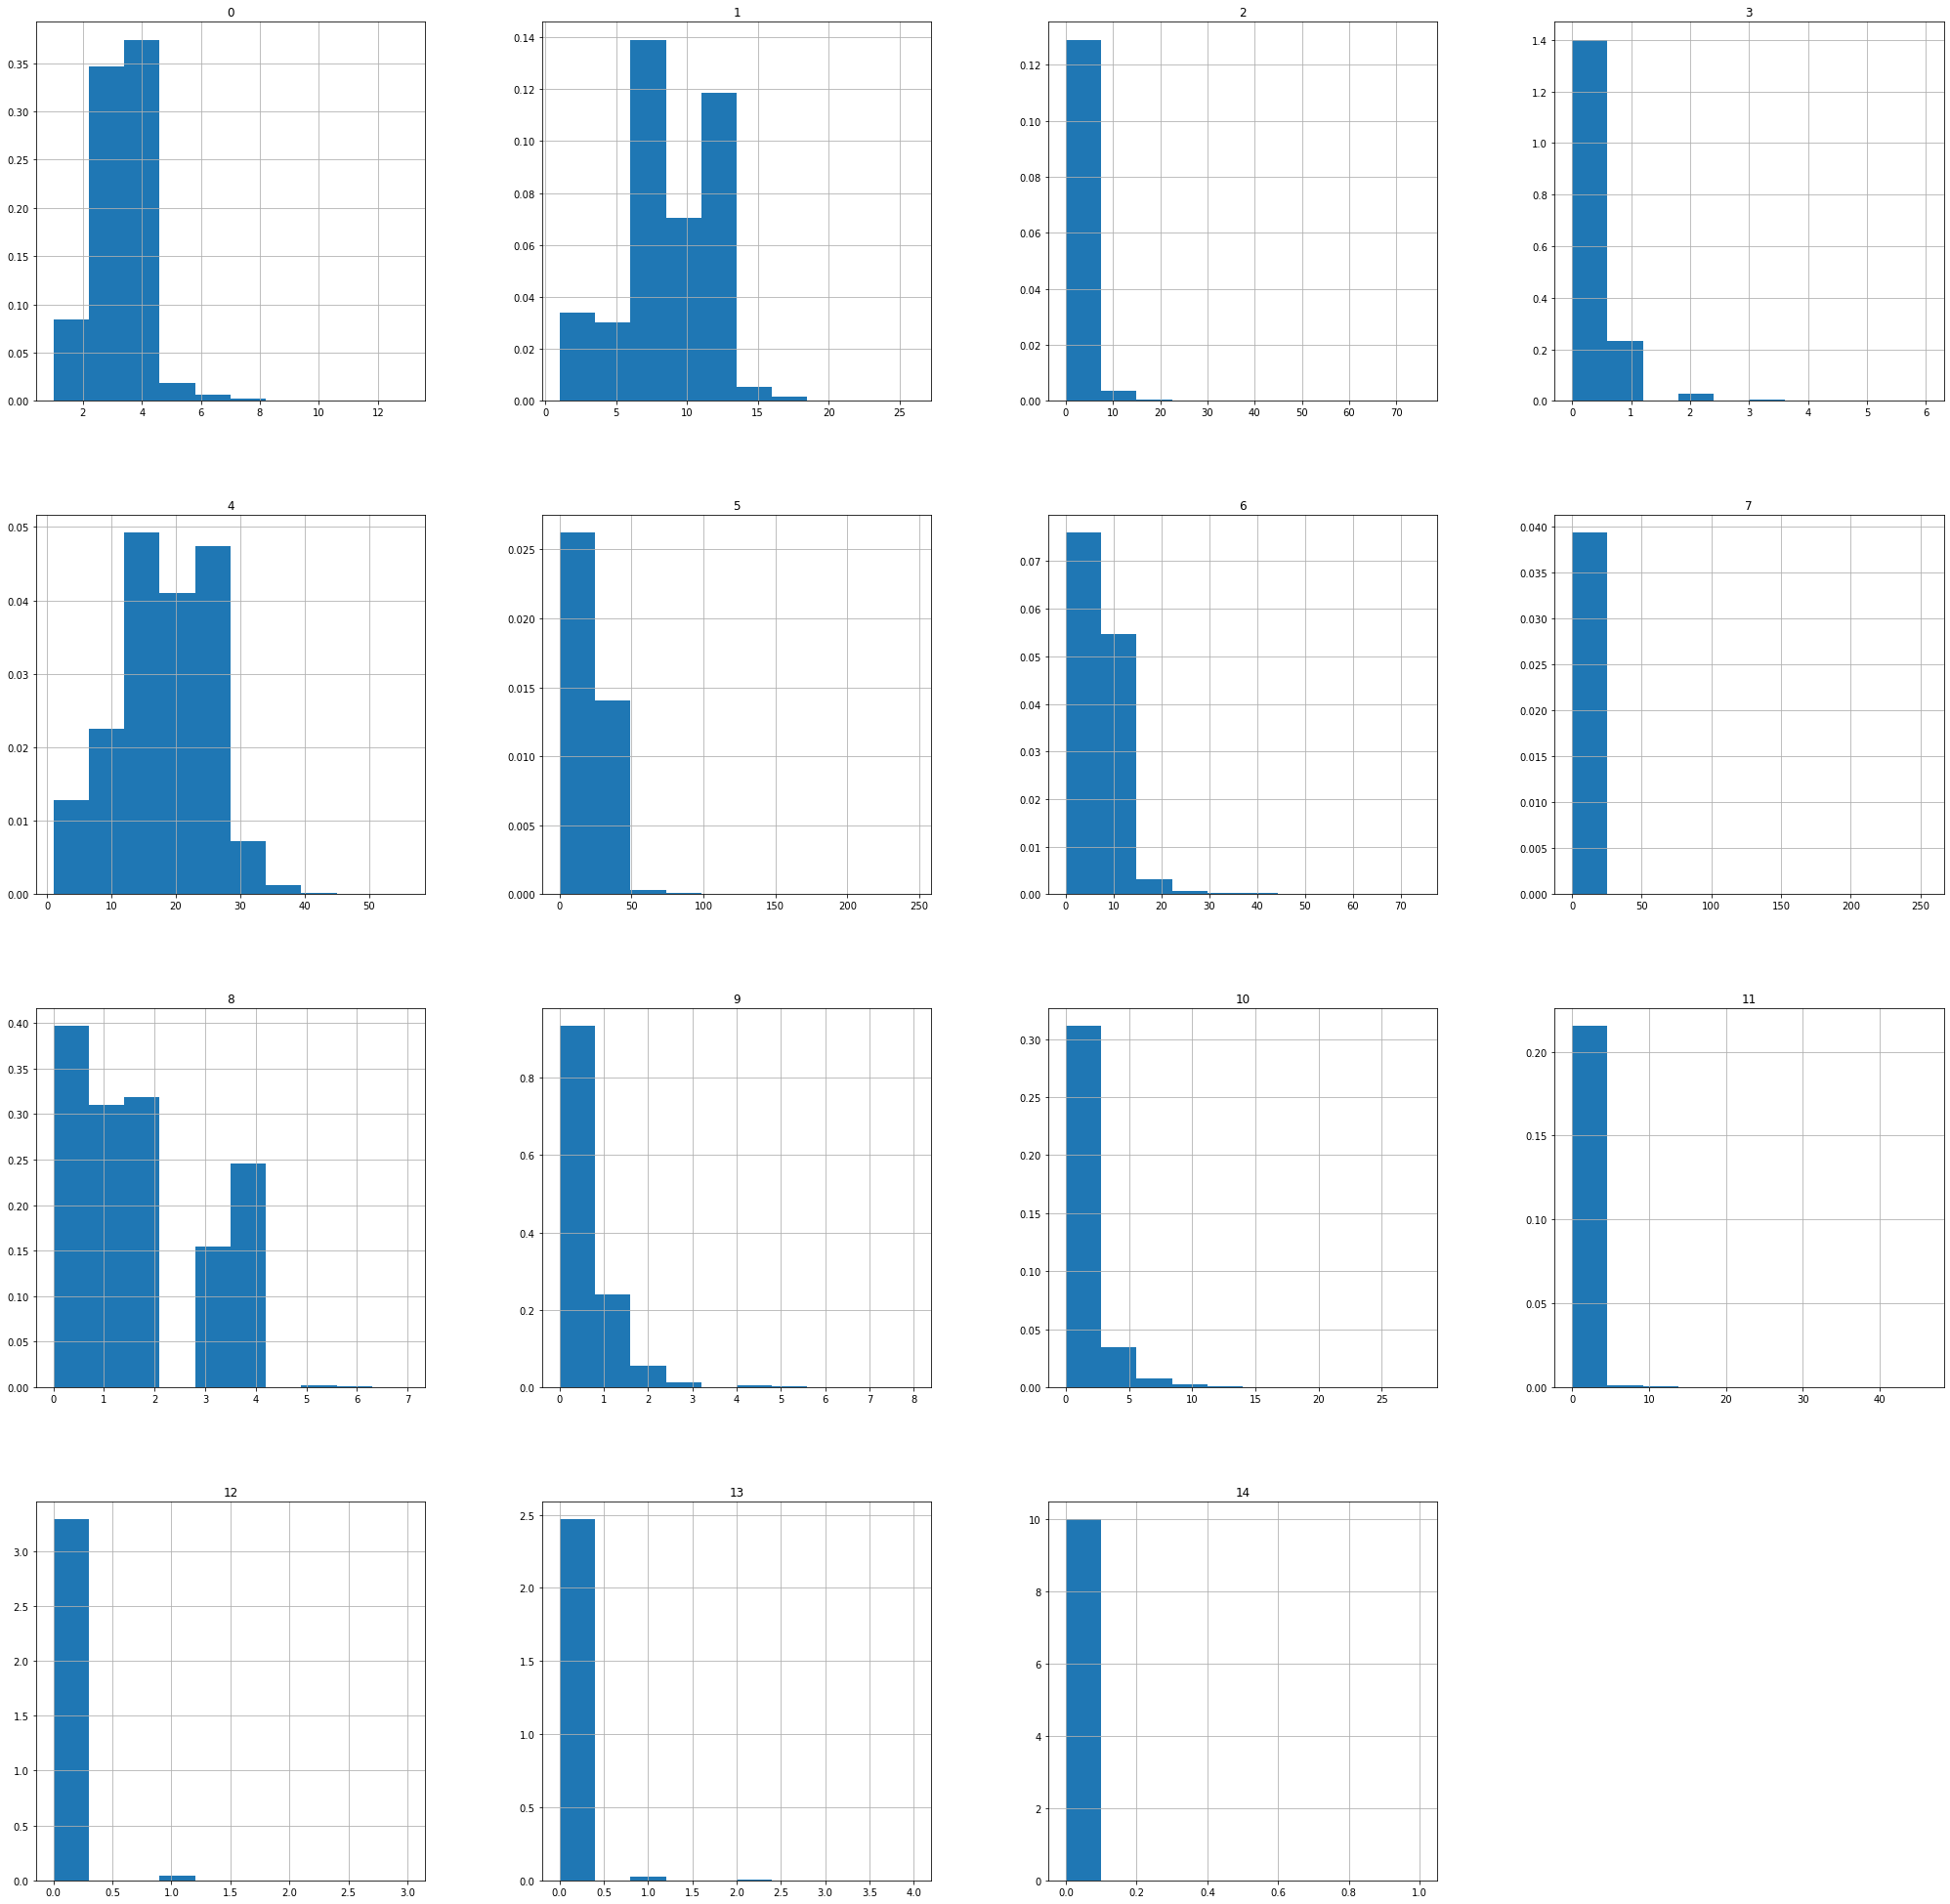

In [7]:
NY_GDM = cities_GDMs[('New York', 'USA')]
NY_GDM_df = pd.DataFrame(data=NY_GDM)
NY_hist_arr = NY_GDM_df.hist(figsize=(35,35), density=True, log=False)

As expected, they do not seem to follow a scale-free distribution: tails are not very long, and some of them even have very few low values. We can verify that the maximum value of each orbit count is indeed not too large (except for paths)

In [8]:
np.amax(NY_GDM, axis=0)

array([ 13,  26,  75,   6,  56, 246,  74, 254,   7,   8,  28,  46,   3,
         4,   1])

Repeating the plots for Paris and Rio to verify that the trend repeats:

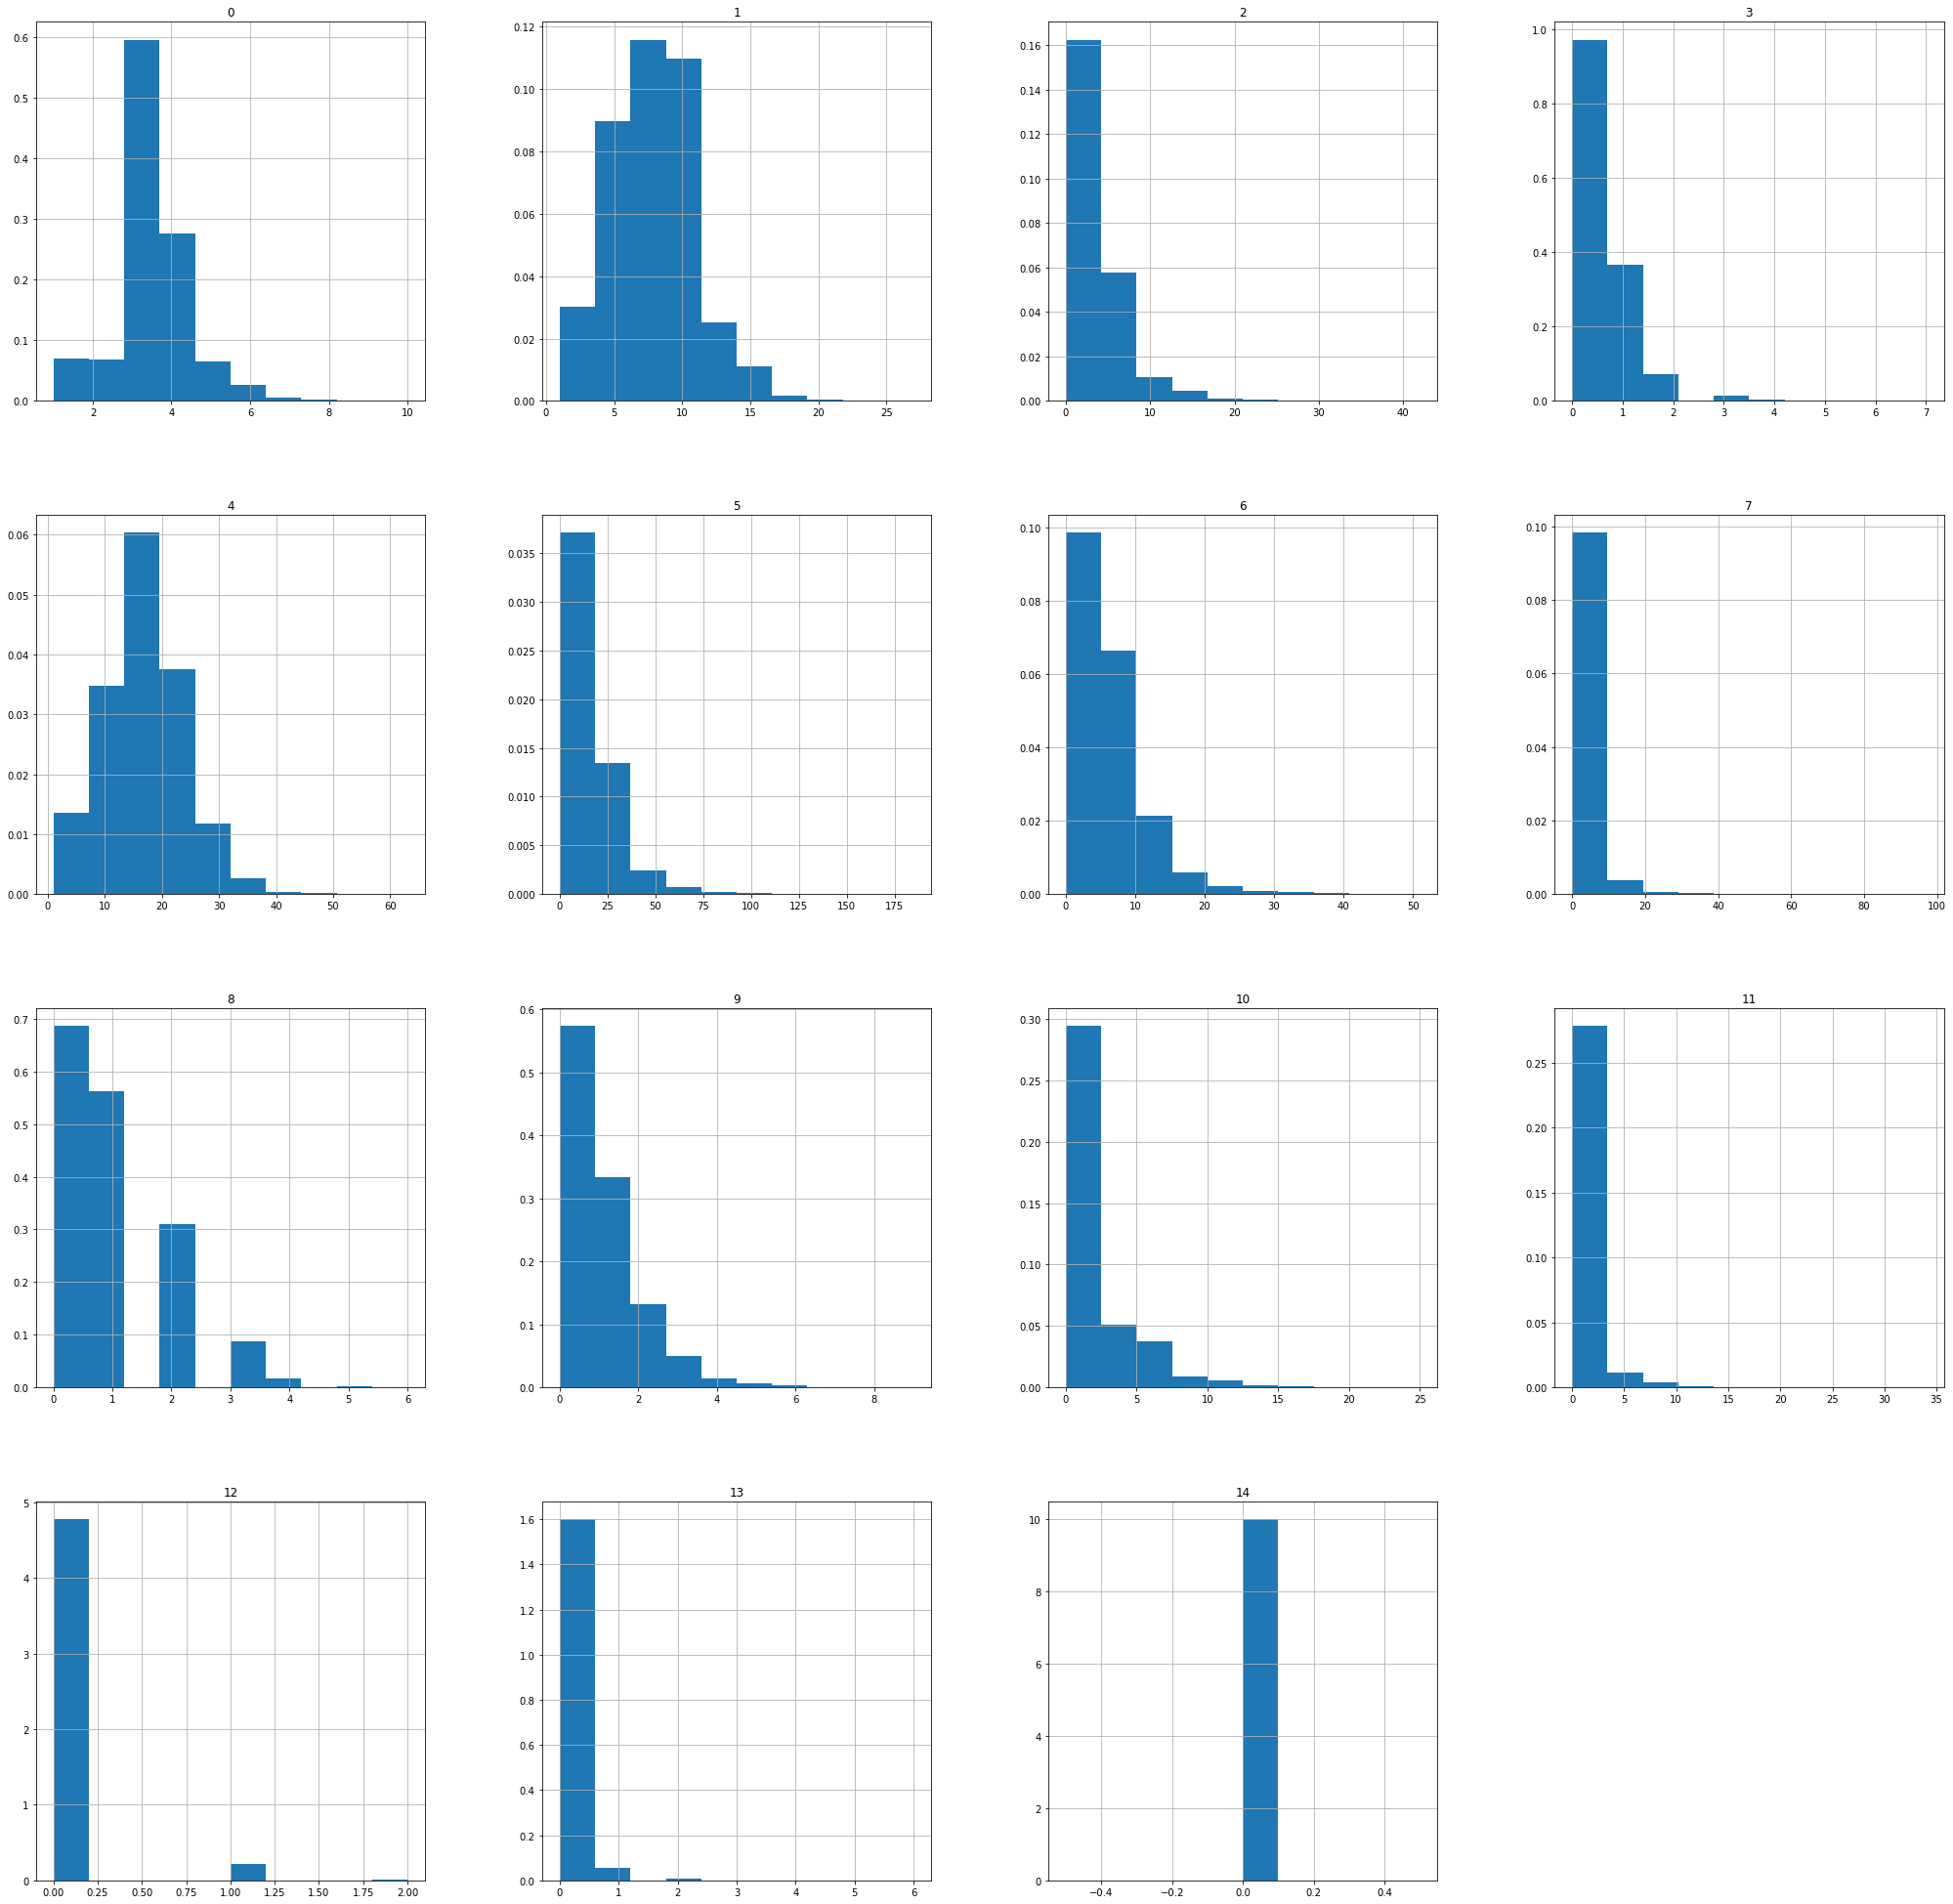

In [9]:
Paris_GDM = cities_GDMs[('Paris', 'France')]
Paris_GDM_df = pd.DataFrame(data=Paris_GDM)
Paris_hist_arr = Paris_GDM_df.hist(figsize=(35,35), density=True, log=False)

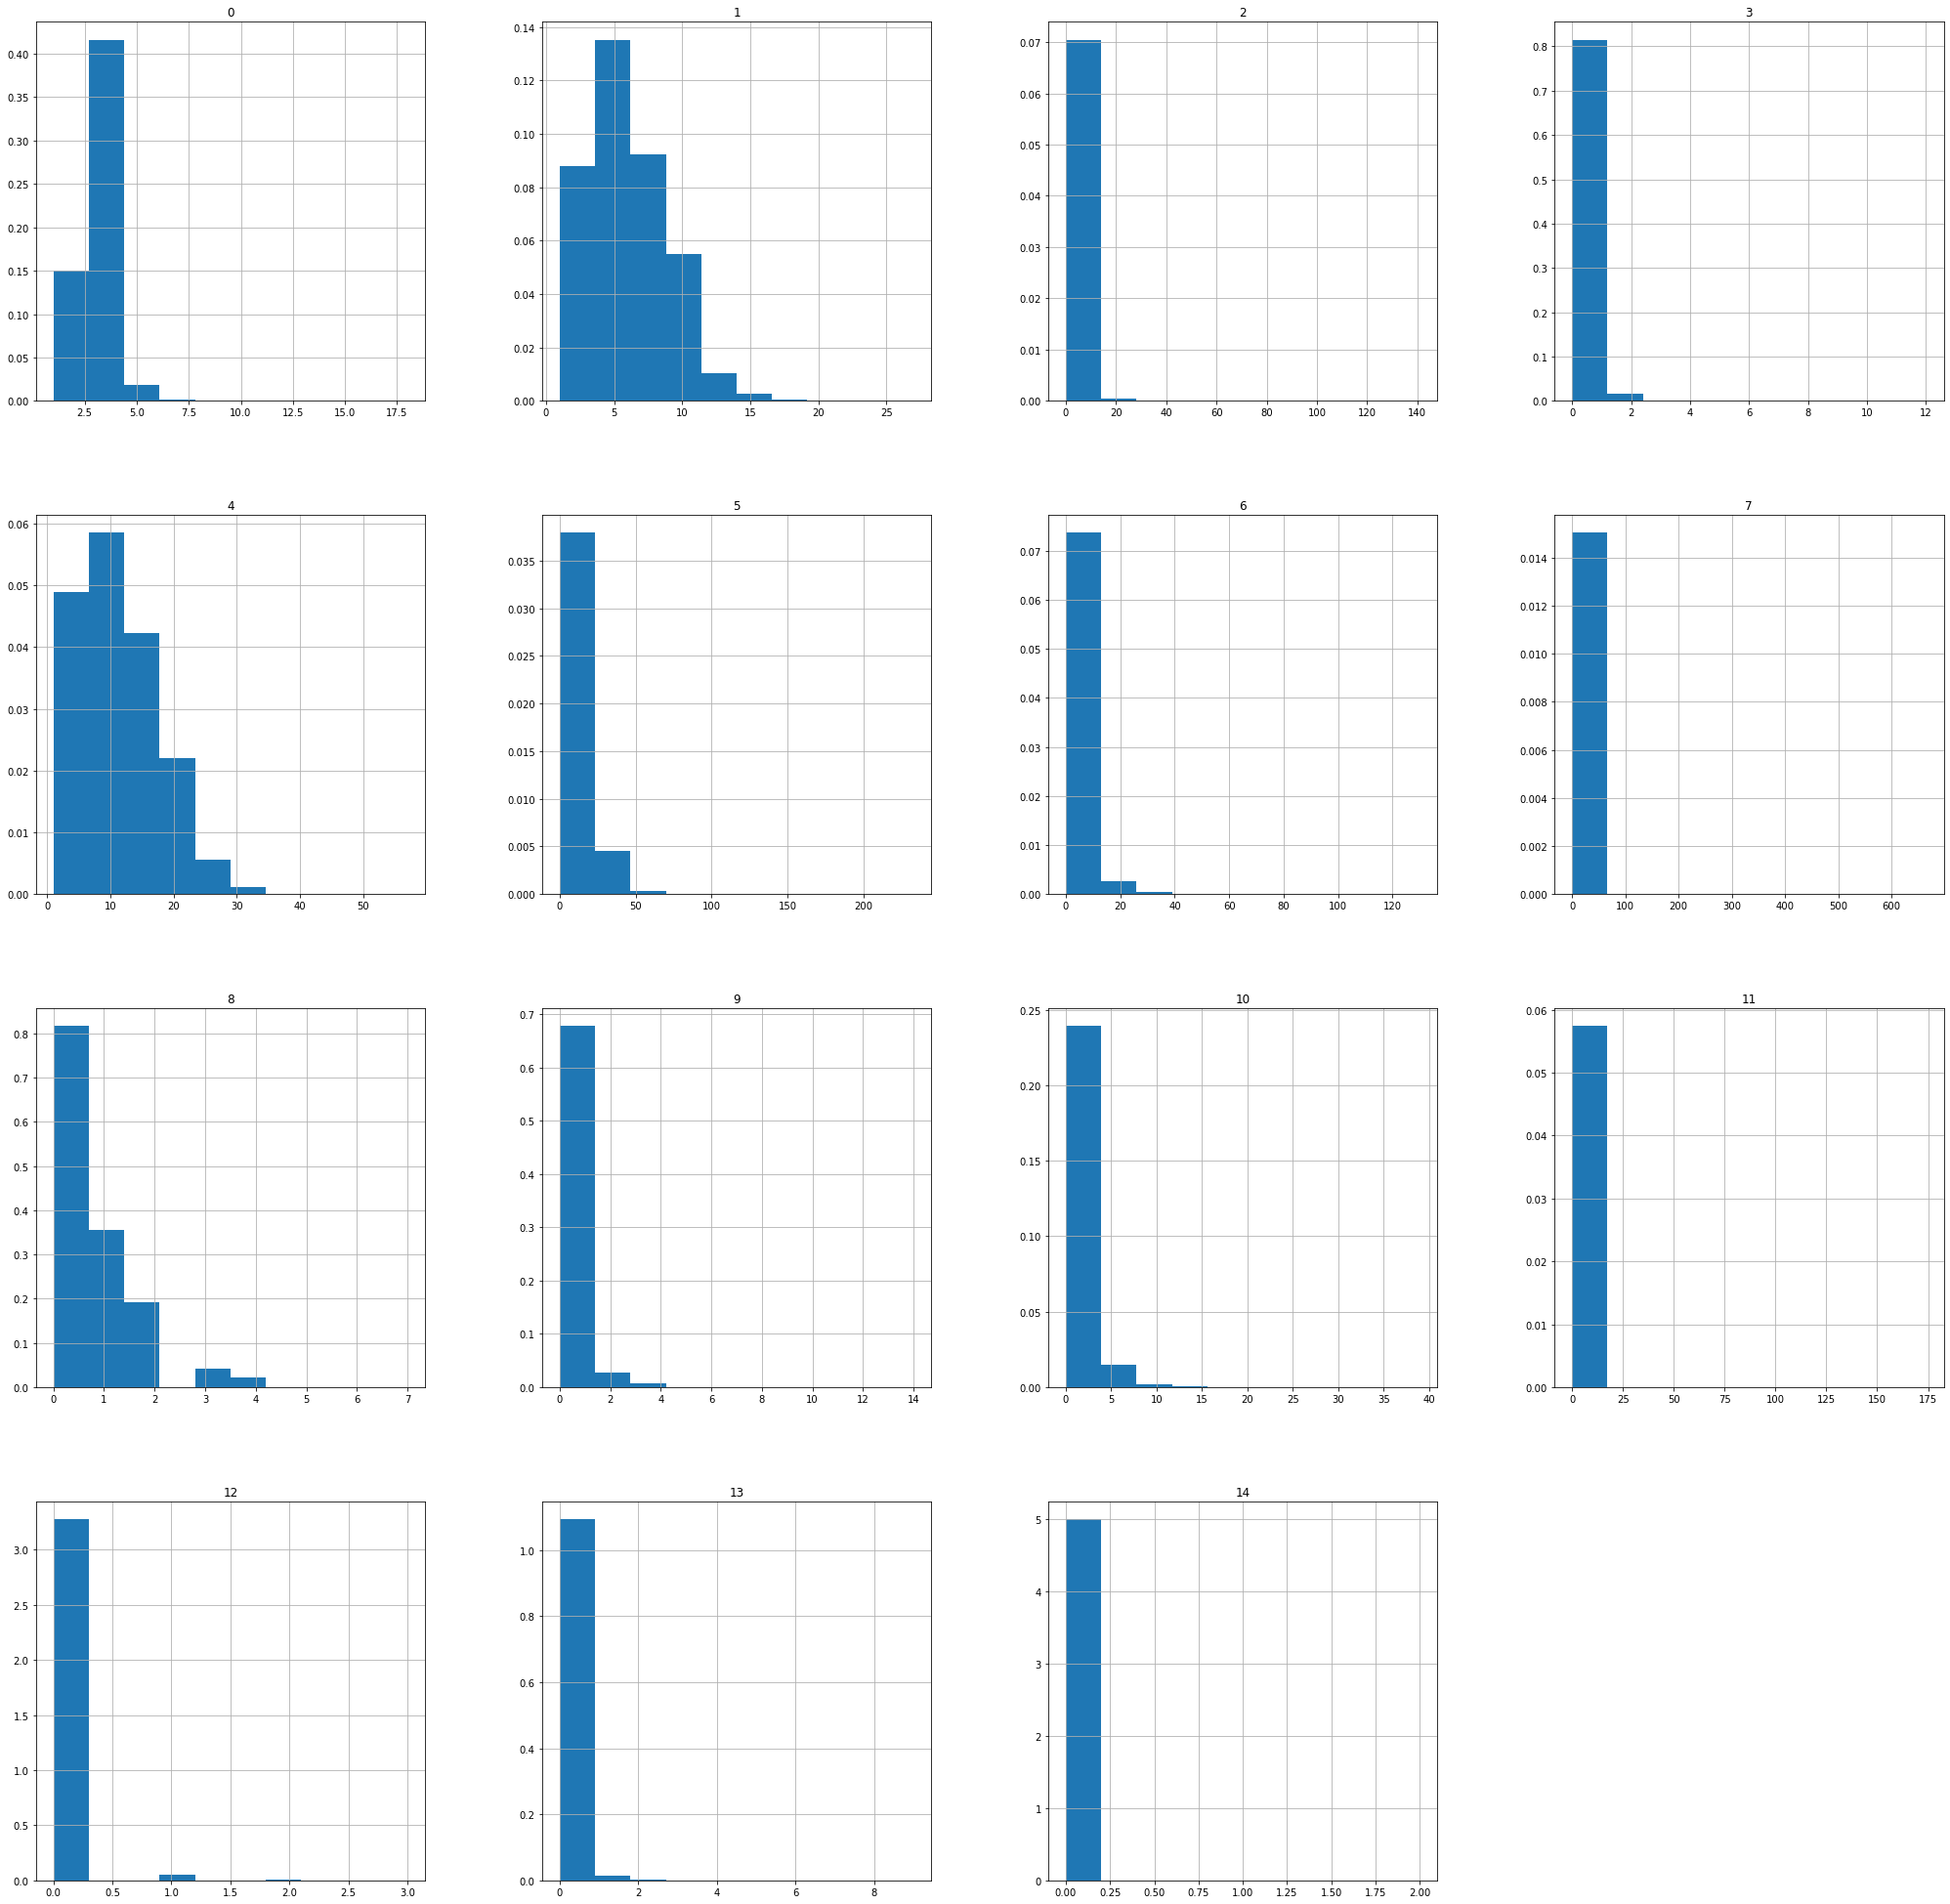

In [10]:
RJ_GDM = cities_GDMs[('Rio de Janeiro', 'Brazil')]
RJ_GDM_df = pd.DataFrame(data=RJ_GDM)
RJ_hist_arr = RJ_GDM_df.hist(figsize=(35,35), density=True, log=False)

We plot these histograms together for comparative visualization:

In [89]:
NY_GDM_df['city'] = 'New York'
Paris_GDM_df['city'] = 'Paris'
RJ_GDM_df['city'] = 'Rio de Janeiro'
joined_df = pd.concat([NY_GDM_df, Paris_GDM_df, RJ_GDM_df], axis=0, ignore_index=True)

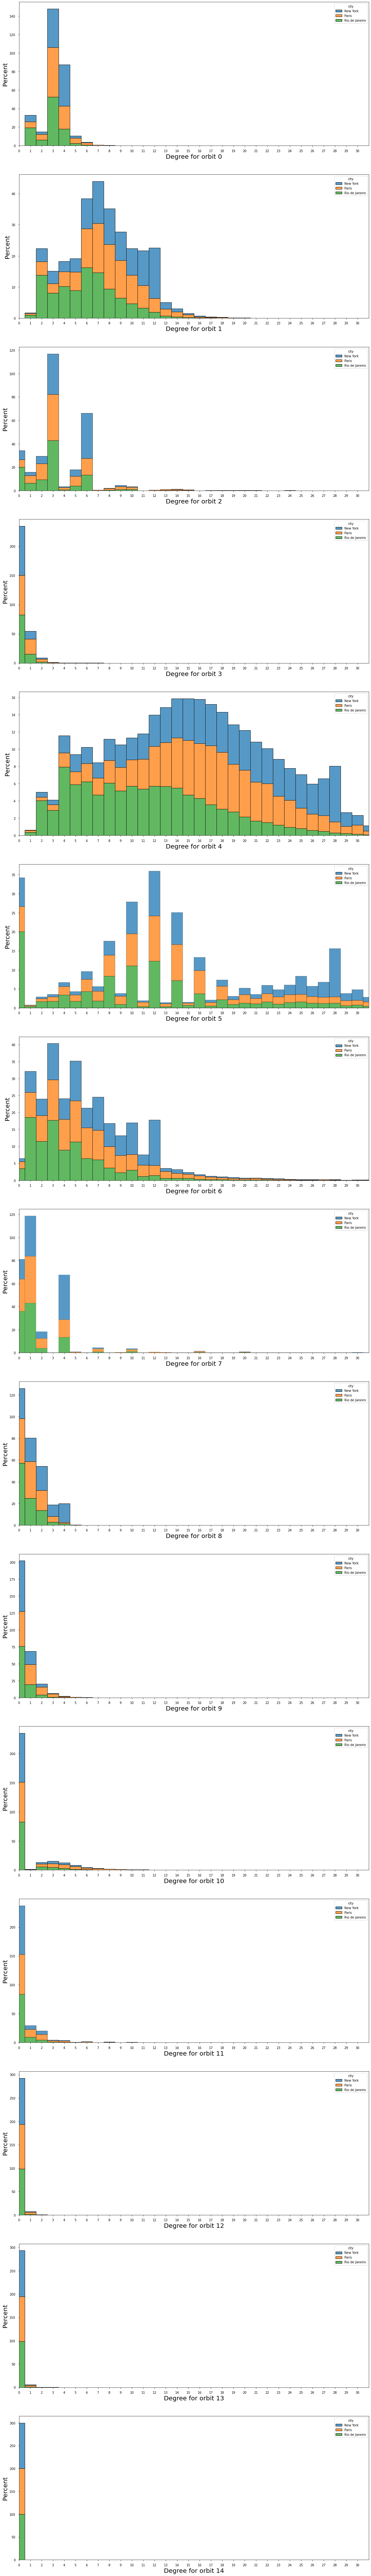

In [122]:
fig, Axes = plt.subplots(figsize=(20, 150), nrows=15, ncols=1)

m=30

for orbit, ax in zip(range(15), Axes.flatten()):
    sns.histplot(data=joined_df, x=orbit, hue='city', discrete=True, stat="percent", common_norm=False, fill=True, ax=ax, multiple='stack')
    ax.set_xticks(list(range(m+1)), minor=False)
    ax.set_ylabel('Percent', fontsize=20)
    ax.set_xlabel('Degree for orbit ' + str(orbit), fontsize=20)
    ax.set_xlim(0, m+1)

plt.savefig('figures/histograms.png')